# Lab 7
### Segmentation 2

In [8]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [147]:
def getThreshold(img):
    numPixels = img.shape[0] * img.shape[1]
    histogram = getHist(img)
    grayLevelsCount = len(histogram)
    tInit = 0
    for grayLevel in range(grayLevelsCount):
        segma = grayLevel * histogram[grayLevel]
        tInit += segma
        
    tInit = np.around(tInit/numPixels, decimals=0) 
    t0 = int(tInit)
    #print("t0", t0)
    t1 = 2*t0
    while(abs(t1 - t0) > 0.1):
        #lower = np.copy(histogram)
        #upper = np.copy(histogram)
        
        lower = histogram[0:int(t0)]
        print(t0)
        upper = histogram[int(t0):]
        
        lowerPixels = np.sum(lower)
        upperPixels = np.sum(upper)
        lowerSum = 0
        upperSum = 0
        for i in range(len(lower)):
            lowerSum += i*lower[i]
        
        for i in range(len(upper)):
            upperSum += ((len(lower)+i+1)*upper[i])
        
        lowerAvg = lowerSum / lowerPixels

        upperAvg = upperSum / upperPixels
        
        print("lower upper", lowerAvg, upperAvg)
        t1 = t0
        t0 = (lowerAvg + upperAvg) / 2
        print("hehe we are",t1,t0)
        print(t1 - t0)
    return t1

119
lower upper 44.33894736842105 160.69189086864958
hehe we are 119 102.51541911853532
16.48458088146468
102.51541911853532
lower upper 29.43845344555497 156.2057559214203
hehe we are 102.51541911853532 92.82210468348762
9.693314435047697
92.82210468348762
lower upper 24.67963515567817 154.68692830978546
hehe we are 92.82210468348762 89.68328173273181
3.1388229507558094
89.68328173273181
lower upper 23.729121444076316 154.34844888611283
hehe we are 89.68328173273181 89.03878516509458
0.6444965676372334
89.03878516509458
lower upper 23.729121444076316 154.34844888611283
hehe we are 89.03878516509458 89.03878516509458
0.0
89.03878516509458


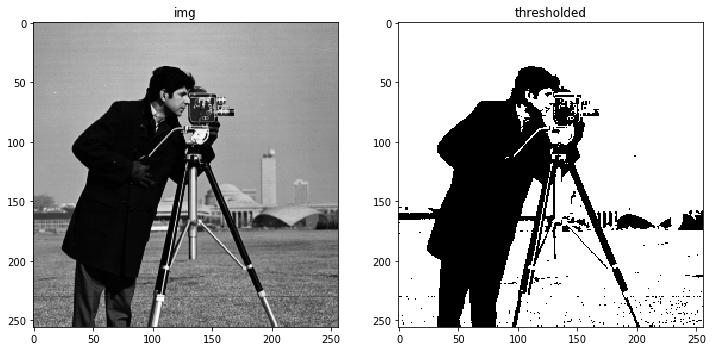

119
lower upper 44.33894736842105 160.69189086864958
hehe we are 119 102.51541911853532
16.48458088146468
102.51541911853532
lower upper 29.43845344555497 156.2057559214203
hehe we are 102.51541911853532 92.82210468348762
9.693314435047697
92.82210468348762
lower upper 24.67963515567817 154.68692830978546
hehe we are 92.82210468348762 89.68328173273181
3.1388229507558094
89.68328173273181
lower upper 23.729121444076316 154.34844888611283
hehe we are 89.68328173273181 89.03878516509458
0.6444965676372334
89.03878516509458
lower upper 23.729121444076316 154.34844888611283
hehe we are 89.03878516509458 89.03878516509458
0.0
89.03878516509458


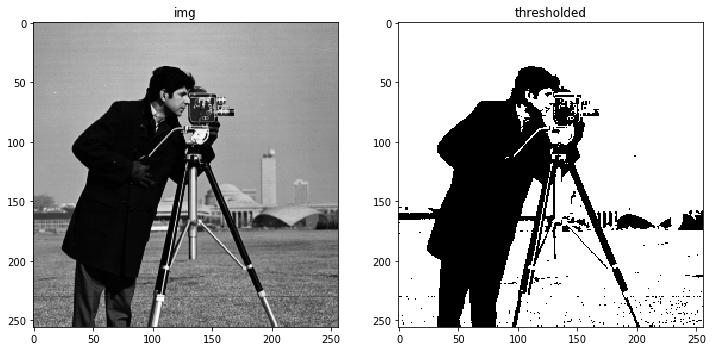

165
lower upper 96.06967788160134 208.9054309059687
hehe we are 165 152.48755439378502
12.512445606214982
152.48755439378502
lower upper 85.41893990959387 204.8061599370694
hehe we are 152.48755439378502 145.11254992333164
7.375004470453376
145.11254992333164
lower upper 82.75272436188986 203.71061662698176
hehe we are 145.11254992333164 143.2316704944358
1.8808794288958381
143.2316704944358
lower upper 82.26672901652272 203.49280280964803
hehe we are 143.2316704944358 142.87976591308538
0.3519045813504249
142.87976591308538
lower upper 82.0391171489581 203.38727076591155
hehe we are 142.87976591308538 142.71319395743484
0.1665719556505394
142.71319395743484
lower upper 82.0391171489581 203.38727076591155
hehe we are 142.71319395743484 142.71319395743484
0.0
142.71319395743484


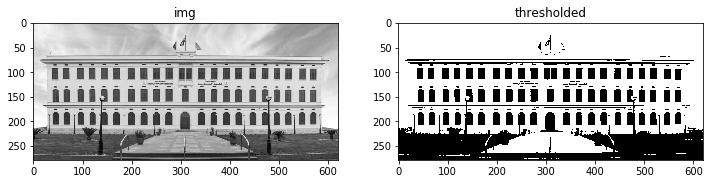

128
lower upper 34.192168922682036 238.38337605272793
hehe we are 128 136.28777248770498
-8.287772487704984
136.28777248770498
lower upper 35.740140593351605 240.41498492895076
hehe we are 136.28777248770498 138.07756276115117
-1.7897902734461866
138.07756276115117
lower upper 36.07478921743261 240.83072488831243
hehe we are 138.07756276115117 138.45275705287253
-0.3751942917213569
138.45275705287253
lower upper 36.07478921743261 240.83072488831243
hehe we are 138.45275705287253 138.45275705287253
0.0
138.45275705287253


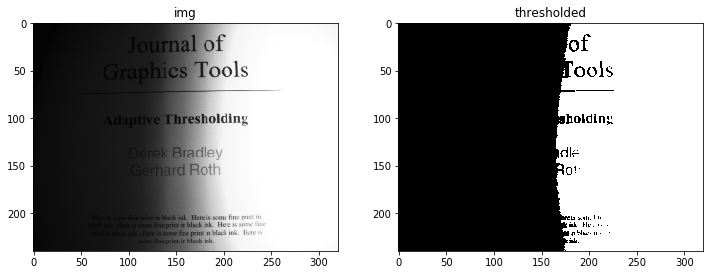

finished


In [148]:
imgs = ['cameraman.png', 'cameraman.png', 'cufe.png', 'book.png']
for img in imgs:
    img = io.imread(img)
    if len(img.shape) == 3:
        img = rgb2gray(img)
        img = (img * 255).astype(np.uint8)
    t = getThreshold(img)
    print(t)
    thresholded = np.copy(img) >t
    show_images((img,thresholded), ("img", "thresholded"))
print('finished')